In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os
from pathlib import Path
from glob import glob
import random

In [32]:
path = Path('../data')

In [33]:
images = list(path.glob('BSR/BSDS500/data/images/train/*.jpg'))
len(images)

200

../data/BSR/BSDS500/data/images/train/22090.jpg


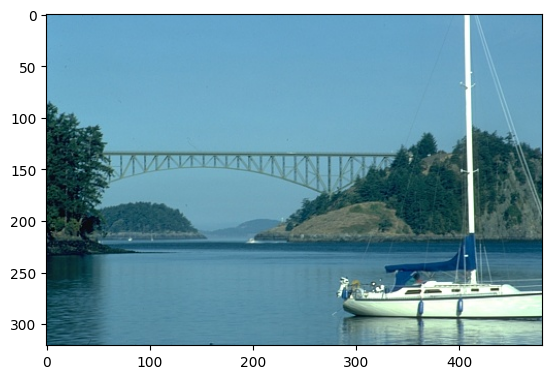

In [55]:
img_path = random.choice(images)
print(img_path)
img1 = cv2.imread(img_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

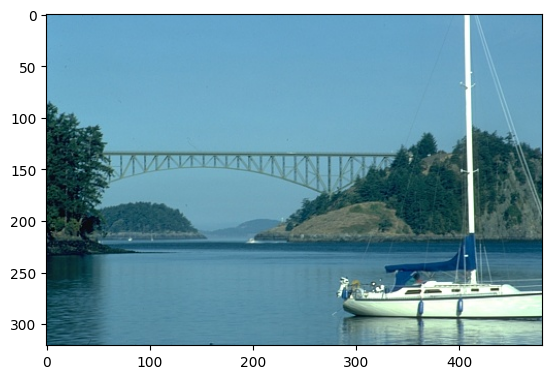

In [58]:
sample_path = '../data/BSR/BSDS500/data/images/train/22090.jpg'
sample = cv2.imread('../data/BSR/BSDS500/data/images/train/22090.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
plt.imshow(sample)
plt.show()

# Simple Thresholding

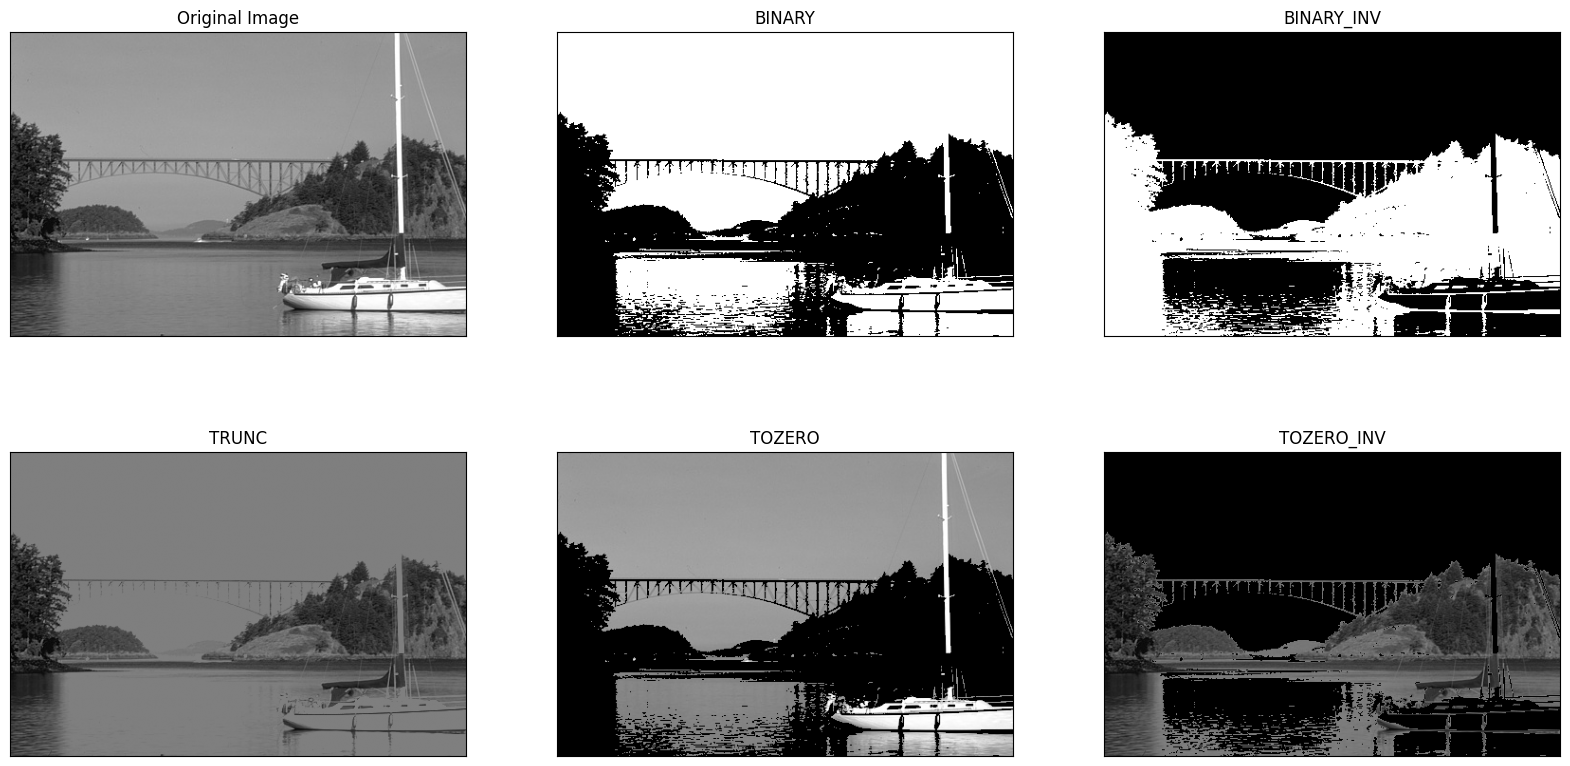

In [64]:
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

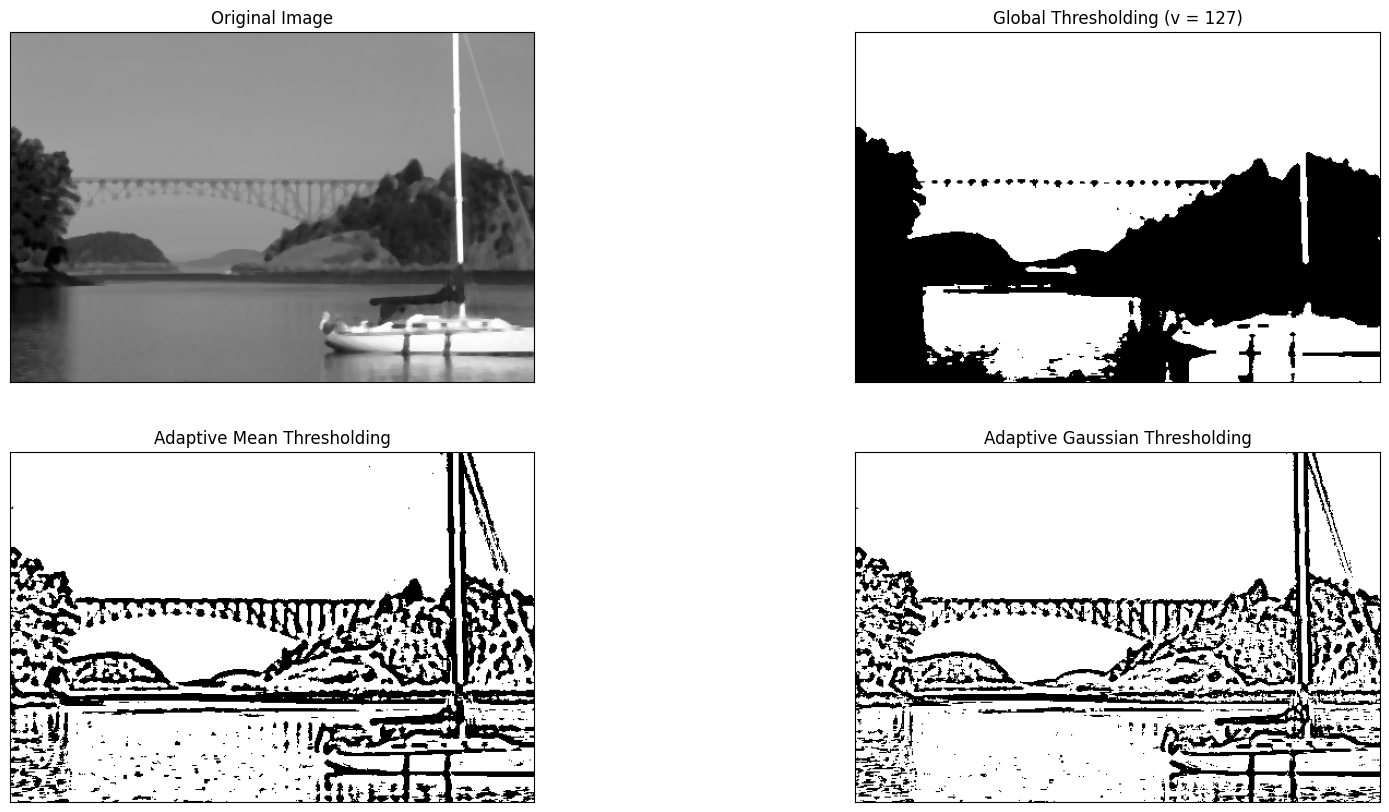

In [66]:
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,5)
plt.figure(figsize=(20, 10))
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()